In [1]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from math import *

## Fonction d'onde hydrogénoïde

Puisque $|Y_{\ell,m}(r,\theta,\phi)|^2$ est *indépendant de $\phi$*, on a simplement

$$ \rho_{n,\ell,m}(r,\theta,\phi) \ \propto \ R_{n,\ell}(r)^2 \, P_\ell^m(\cos \theta)^2 $$

Partie radiale, avec $k_n = \frac{1}{a_0 n}$ :
$$ R_{n,\ell}(r) \ \propto \ (2 k_n r)^\ell \, L_{n-\ell-1}^{2\ell+1}(2 k_n r) \, \mathrm{e}^{-k_n r} $$

In [2]:
def raw_Rnl (n, l, r):
    kn = 1/n
    return (2*kn*r)**l * scipy.special.assoc_laguerre(2*kn*r, n-l-1, 2*l+1) * np.exp(-kn*r)

def raw_density (n, l, m, r, theta):
    return raw_Rnl(n, l, r)**2 * scipy.special.lpmv(m,l,np.cos(theta))**2

## Courant de probabilité

On suppose qu'un état propre s'écrit sous la forme
$$ \psi (r, \theta, \phi) = R_{n, \ell} (r) Y_{\ell, m} (\theta, \phi) $$

avec $R_{n, \ell}$ fonction radiale, **réelle**, avec
$\int_0^{\infty} r^2 R_{n, \ell} (r)^2 \mathrm{d} r = 1$, où $n$ représente les
autres nombres quantiques de l'ECOC; et $Y_{\ell m}$ les harmoniques
sphériques. On vérifie la normalisation :

$$ \iiint_{\mathbb{R}^3} | \psi (r, \theta, \phi) |^2 \mathrm{d}^3 \mathcal{V}
   \ = \ \underbrace{\int_0^{\infty} R_{n, \ell} (r)^2 r^2 \mathrm{d} r}_{= 1} 
   \underbrace{\iint_{\mathbb{S}^2} | Y_{\ell, m} (\theta, \phi) |^2 \sin
   \theta \mathrm{d} \theta \mathrm{d} \phi}_{= 1} \ = \ 1 $$
   
Courant de probabilité associé à l'état en polaire :
$$ \vec{j} \ = \
   \frac{\mathrm{i} \hbar}{2 \mu}  (\psi \vec{\nabla} \psi^{\ast} - \psi^{\ast} 
   \vec{\nabla} \psi) \quad \text{où} \quad \vec{\nabla} =
   \left[\begin{smallmatrix}
     \partial_r\\
     r^{- 1} \partial_{\theta}\\
     (r \sin \theta)^{- 1} \partial_{\phi}
   \end{smallmatrix}\right] $$

On voit que les composantes $j_r$ et $j_{\theta}$ sont nulles ($j_r = 0$ est
cohérent avec le fait que la partie radiale $R_{n, \ell} (r)$ est réelle,
donc la particule n'a pas d'impulsion radiale; et $j_{\theta} = 0$ est
cohérent avec le fait qu'on a affaire à un état propre de $\boldsymbol{J}_z$,
donc $\langle \boldsymbol{J}_{x, y} \rangle = 0$). Donc $\vec{j}=j_\phi(r,\theta)\ \vec{u}_\phi$. Calcul de $j_{\phi}$ :

$$\begin{eqnarray*}
  j_{\phi} (r, \theta) & = & \frac{\mathrm{i} \hbar}{2 \mu}  \left( \psi
  \frac{1}{r \sin \theta} \partial_{\phi} \psi^{\ast} - \psi^{\ast} 
  \frac{1}{r \sin \theta} \partial_{\phi} \psi \right)\\
  & = & \frac{\mathrm{i} \hbar}{2 \mu}  \left( R_{n \ell} Y_{\ell m}  \frac{1}{r
  \sin \theta} \partial_{\phi} R_{n \ell} Y_{\ell m}^{\ast} - R_{n \ell}
  Y_{\ell m}^{\ast}  \frac{1}{r \sin \theta} \partial_{\phi} R_{n, \ell}
  Y_{\ell, m} \right)\\
  & = & \frac{\mathrm{i} \hbar}{2 \mu} R_{n \ell} (r)^2  \frac{Y_{\ell m}
  \partial_{\phi} Y_{\ell m}^{\ast} - Y_{\ell m}^{\ast} \partial_{\phi}
  Y_{\ell m}}{r \sin \theta}\\
  & = & \frac{\mathrm{i} \hbar}{2 \mu} R_{n \ell} (r)^2  \sqrt{\frac{2 \ell +
  1}{4 \pi}  \frac{(\ell - m) !}{(\ell + m) !}}^2 P_{\ell}^m (\cos \theta)^2 
  \frac{\mathrm{e}^{\mathrm{i} m \phi} \partial_{\phi} \mathrm{e}^{- \mathrm{i} m \phi} -
  \mathrm{e}^{- \mathrm{i} m \phi} \partial_{\phi} \mathrm{e}^{\mathrm{i} m \phi}}{r \sin
  \theta}\\
  & = & \frac{\mathrm{i} \hbar}{2 \mu} R_{n \ell} (r)^2  \frac{2 \ell + 1}{4 \pi}
  \frac{(\ell - m) !}{(\ell + m) !} P_{\ell}^m (\cos \theta)^2  \frac{-
  \mathrm{i} m - \mathrm{i} m}{r \sin \theta}\\
  & = & \frac{\hbar m}{2 \mu}  \frac{2 \ell + 1}{4 \pi}  \frac{(\ell - m)
  !}{(\ell + m) !}  \underbrace{\frac{R_{n \ell} (r)^2}{r}}_{= \frac{\rho_{n
  \ell} (r)}{r^3}}  \frac{P_{\ell}^m (\cos \theta)^2}{\sin \theta}
\end{eqnarray*}$$

In [3]:
def raw_jphi (l, m, theta):
    #                                                c'est bien les P_l^n
    return m*(2*l+1)*factorial(l-m)/factorial(l+m) * scipy.special.lpmv(m,l,np.cos(theta))**2 / np.sin(theta)

---

In [4]:
def gen_r_theta_coords (rmax):
    z = np.linspace(-rmax,+rmax,500)
    x = np.linspace(-rmax,+rmax,500)
    Z, X = np.meshgrid(z,x)
    r = np.sqrt(Z**2+X**2)
    theta = np.arctan2(Z,X)
    return (r, theta)

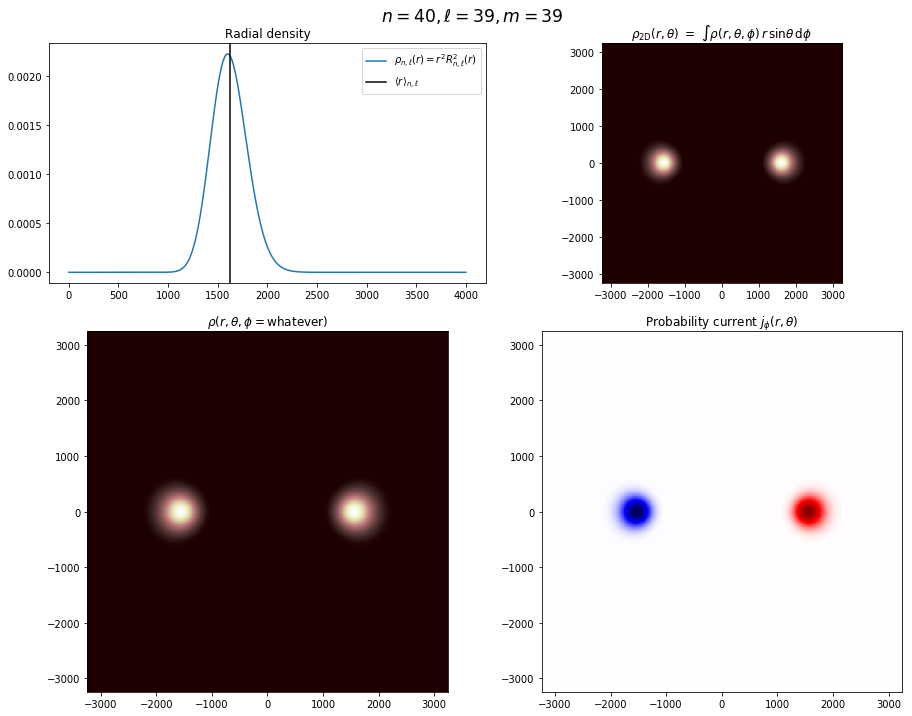

In [58]:
n = 40
l = 39
m = 39

fig = plt.figure(figsize=(13,10), constrained_layout=True)
gs = gridspec.GridSpec(ncols=4, nrows=2, figure=fig, height_ratios=[2,3])

ax = fig.add_subplot(gs[0,0:2])
ax.set_title(r"Radial density")
(r,h) = np.linspace(0, 10*n**2, 10000, retstep=True)
R_nl = raw_Rnl(n, l, r)
R_nl /= sqrt(h*np.sum((r*R_nl)**2))
ρ_nl = (r*R_nl)**2
r_mean = h*np.sum( r * ρ_nl )
ax.plot(r[1:2500], ρ_nl[1:2500], label=r"$\rho_{n,\ell}(r)=r^2 R_{n,\ell}^2(r)$")
ax.axvline(x=r_mean, color='black', label=r"$\langle r \rangle_{n,\ell}$")
ax.legend()

#ax = fig.add_subplot(gs[0,2:4], polar=True)
#ax.set_title(r"Probability current $j_\phi(\theta)$ ($\propto_{m,\ell,\theta}$)")
#ax.set_theta_zero_location('S')
#ax.set_thetamin(0)
#ax.set_thetamax(180)
#theta = np.linspace(0+1e-5,np.pi-1e-5,1000)
#j = raw_jphi(l, m, theta)
#ax.plot(theta, j)

rmax = 2*r_mean
(r, theta) = gen_r_theta_coords(rmax)

ax = fig.add_subplot(gs[1,2:4])
(r, theta) = gen_r_theta_coords(rmax)
j_phi = raw_jphi(l,m,theta) * raw_Rnl(n,l,r)**2/r
ax.imshow(j_phi, cmap='seismic', extent=[-rmax,+rmax,-rmax,+rmax])
ax.set_title(r"Probability current $j_\phi(r,\theta)$")

ax = fig.add_subplot(gs[0,2:4])
density = raw_density(n, l, m, r, theta)
density_2D = r * np.abs(np.sin(theta)) * density
ax.imshow(density_2D, cmap='pink', extent=[-rmax,+rmax,-rmax,+rmax])
ax.set_title(r"$\rho_\mathrm{2D}(r,\theta)\ =\ \int \rho(r,\theta,\phi) \,r\,\sin\theta\,\mathrm{d}\phi$")

ax = fig.add_subplot(gs[1,0:2])
ax.imshow(density, cmap='pink', extent=[-rmax,+rmax,-rmax,+rmax])
ax.set_title(r"$\rho(r,\theta,\phi=\operatorname{whatever})$")

fig.suptitle("$n={},\ell={},m={}$".format(n,l,m), size='xx-large')
None

plt.savefig("orbital_n{}_l{}_m{}.pdf".format(n,l,m))